## Projekt zrelizowano w ramach przedmiotu "Eksploracja danych biomedycznych" 2019/2020
### Bartłomiej Król-Józaga
#### rok V IB na WEAiIB AGH

### Example statistical analysis of terrorist attacks around the world

This project implements 5 sample statistical analyzes along with visualizations based on a dataset: Global Terrorism Dataset https://www.kaggle.com/START-UMD/gtd

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Preprocessing the data.

In [2]:
terror = pd.read_csv('/Users/bartek/Downloads/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                     'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                     'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type','motive':'Motive'}, inplace=True)
terror = terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


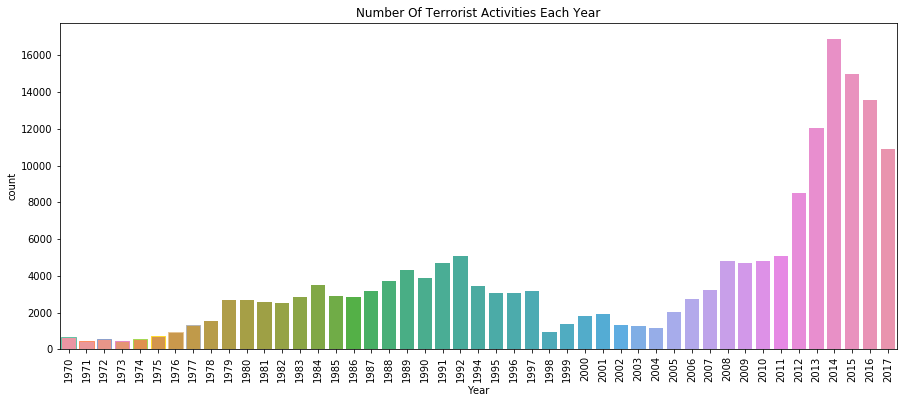

In [3]:
# nr of attacks per year

plt.subplots(figsize=(15,6))
sns.countplot('Year', data=terror, edgecolor=sns.color_palette("Set2"))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

Of course, the first graph shows the change in the number of all attacks over the years.

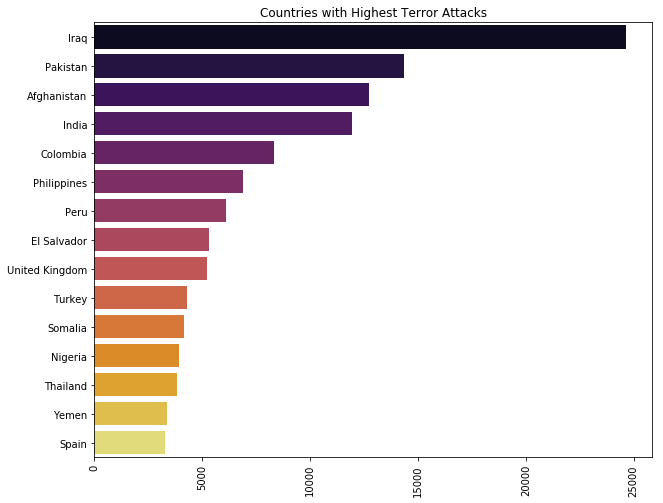

In [4]:
# top 10 most dangerous places

sns.barplot(terror['Country'].value_counts()[:15].values,terror['Country'].value_counts()[:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Countries with Highest Terror Attacks')
plt.show()

This chart is intended to show the countries most vulnerable to terrorist attacks.

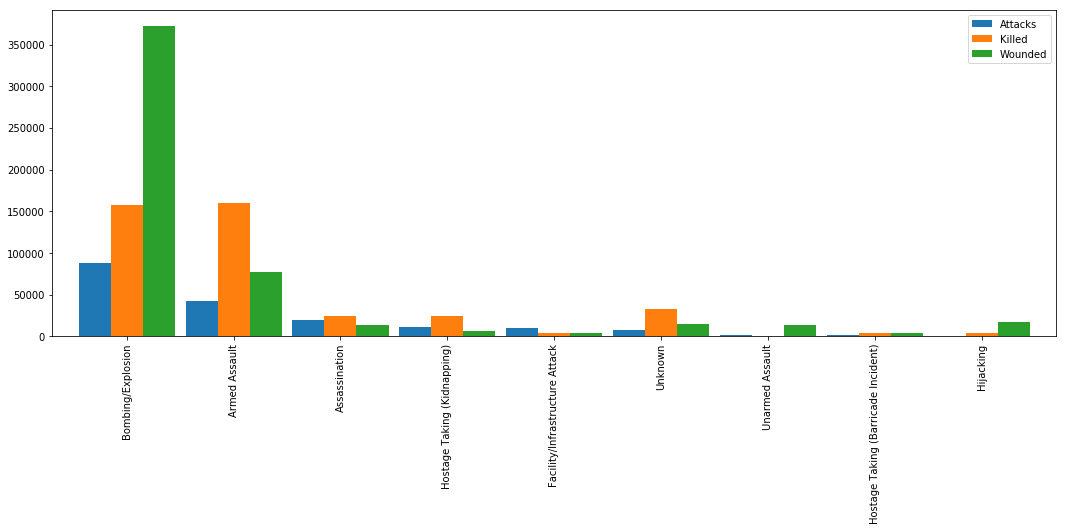

In [5]:
# top most common type

coun_terror=terror['AttackType'].value_counts().to_frame()
coun_terror.columns=['Attacks']
coun_kill=terror.groupby('AttackType')['Killed'].sum().to_frame()
coun_wounded = terror.groupby('AttackType')['Wounded'].sum().to_frame()
coun_kill=coun_kill.merge(coun_wounded,left_index=True,right_index=True,how='left')
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()


As expected, bomb attacks are not only the largest number of fatalities, but also injured. Interestingly - the second most popular method of conducting attacks, with the same number of dead, does not cause so many injured numbers

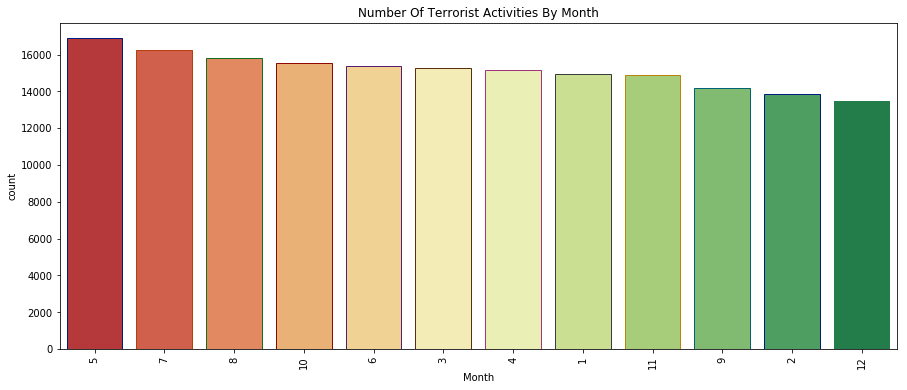

In [6]:
# terrorism by month

plt.subplots(figsize=(15,6))
sns.countplot('Month',data=terror,palette='RdYlGn',edgecolor=sns.color_palette('dark',11),order=terror['Month'].value_counts().index[:12])
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Month')
plt.show()

Interesting is the fact that most attacks take place in May and the least in December. This information may, on the one hand, confirm increased precautions during the holiday season, on the other, motivate to increase caution in May.

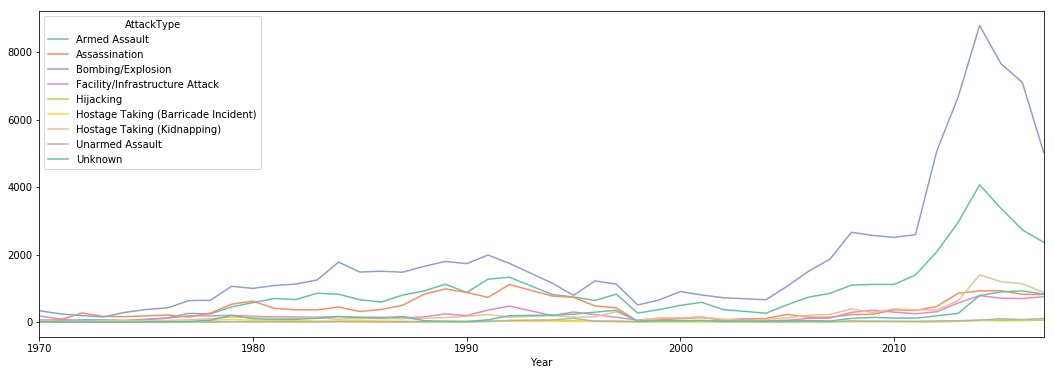

In [7]:
# trend in terrorists method

terror_region=pd.crosstab(terror.Year,terror.AttackType)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

# Conclusion

Given the growing terrorist activity, it is also worth noting the trend among the methods used. By far the most common are Bomb attacks and Armed Assult. This may be related to the results of the search for correlation between the method and the number of victims, both fatal and injured. The analysis also showed that attacks are most often carried out in May and the most vulnerable country is Iraq, Pakistan and Afghanistan. The downward trend has been comforting for three years, which may be related to the tightening of security rules in Western countries